Multi-layer Perceptron Regressor (MLPRegressor) - Exercício - Temperatura Mínima Diária da Cidade de Melbourn Austrália - TDNN (rede neural com retardo de tempo)

In [120]:
from sklearn.model_selection import train_test_split # Biblioteca para separação de amostras para treino e teste, curva de aprendizagem do treinamento e para processar a validação cruzada
from sklearn.neural_network import MLPRegressor # Biblioteca para utilização do Regressor MLP
from sklearn.preprocessing import MinMaxScaler, StandardScaler # Biblioteca utilizada para normalização dos dados
from sklearn.pipeline import Pipeline # Biblioteca para organização de ações em sequência
from sklearn import metrics # Biblioteca para avaliação das métricas no modelo
import matplotlib.pyplot as plt # Para visualizacao dos dados por meio de gráfico
import numpy as np # Biblioteca de manipulação de arrays Numpy
import pandas as pd # Biblioteca para manipulação de dados, aqui especificamente para importação e manipulação inicial do dataset
from google.colab import drive # Biblioteca para interação do colab com o drive
drive.mount('/content/drive') # Montando o Google Drive na mesma conta do Google Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Carregamento e Organização Inicial do Dataset

In [121]:
# Caminho do dataset no Google Drive que será carregado em df
df = pd.read_csv("/content/drive/MyDrive/RNA_Datasets/Daily_minimum_temps.csv") # Carregamento do dataset via Pandas
print(df.head(15))

dfNew = pd.DataFrame(columns = ['x-10', 'x-9', 'x-8', 'x-7', 'x-6', 'x-5', 'x-4', 'x-3', 'x-2', 'x-1', 'x']) # Criação de um novo dataframe para reorganizar os dados das amostras baseada no histórico dos 4 últimos preços e o target o próximo

dados = df.iloc[:, 1].values # Dados recebe a segunda coluna
tam = len(dados) # Recebe a quantidade de amostras

for i in range(tam-10): # A subtração de 10 é para não incluir dados vazios nas amostras que serão geradas
  # É criado um novo dataframe que receberá os dados atrasados e o target em x para construção das amostras que serão apresentado no treinamento
  df_new_row = pd.DataFrame({'x-10': [dados[i]], 'x-9': [dados[i+1]], 'x-8': [dados[i+2]], 'x-7': [dados[i+3]],
                             'x-6': [dados[i+4]], 'x-5': [dados[i+5]], 'x-4': [dados[i+6]], 'x-3': [dados[i+7]],
                             'x-2': [dados[i+8]], 'x-1': [dados[i+9]],'x': [dados[i+10]]})
  # A nova amostra é inserida no dataframe final dfNew
  dfNew = pd.concat([dfNew, df_new_row], ignore_index=True)

y = dfNew[['x']] # Inclusão da variável x no vetor de saídas desejadas
x = dfNew.drop('x', axis=1) # Exclusão da variável x das entradas

        Date  Temp
0   01/01/81  20.7
1   01/02/81  17.9
2   01/03/81  18.8
3   01/04/81  14.6
4   01/05/81  15.8
5   01/06/81  15.8
6   01/07/81  15.8
7   01/08/81  17.4
8   01/09/81  21.8
9   01/10/81  20.0
10  01/11/81  16.2
11  01/12/81  13.3
12  01/13/81  16.7
13  01/14/81  21.5
14  01/15/81  25.0


Pré-Processamento dos Dados

In [122]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
y = scaler.fit_transform(y)

trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.30, random_state=None) # Separação do dataset em amostras para treino e teste, considerando 30% dos valores para teste
testY = testY.ravel()

Aplicação do MLPRegressor

In [123]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(50), activation='relu', solver='adam', alpha = 0.00001,
                       max_iter=5000, tol=0.00001, momentum=0.9, early_stopping=True, epsilon=1e-06,
                       learning_rate_init = 0.001, learning_rate = 'constant')

# Execução do treinamento da RNA, no primeiro parâmetro são os dados de entrada e no segundo parâmetro são os dados de saída
mlp_reg.fit(trainX, trainY)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(alpha=1e-05, early_stopping=True, epsilon=1e-06,
             hidden_layer_sizes=50, max_iter=5000, tol=1e-05)

Avaliação do Modelo

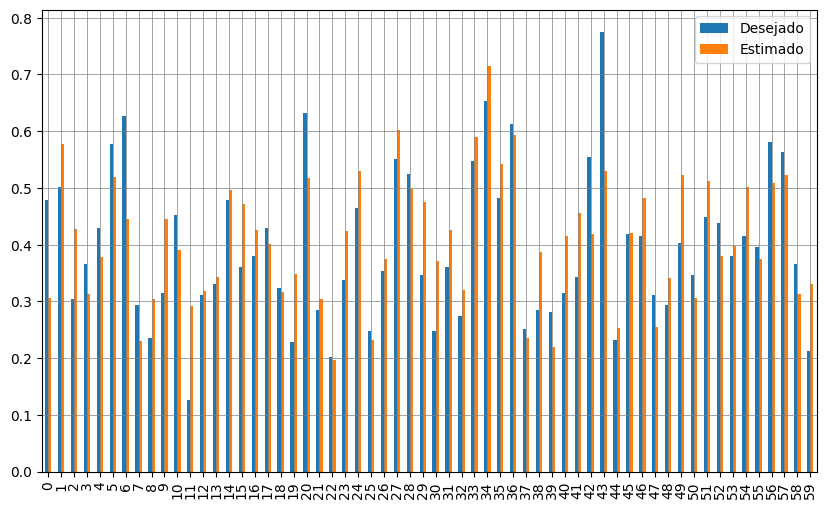

In [124]:
# predict() executa a predição das saídas baseado no modelo treinado no passo anterior com dados não apresentados no treinamento da RNA
y_pred = mlp_reg.predict(testX)

df_temp = pd.DataFrame({'Desejado': testY, 'Estimado': y_pred}) # Criação de um dataframe com os dados desejados e os estimados na predição
df_temp = df_temp.head(60) # Armazena a quantidade de elementos a serem apresentados no gráfico, pois pode ser visualmente difícil de abstrair caso tenham muitas informações
df_temp.plot(kind='bar',figsize=(10,6)) # Configuração do tipo de gráfico 'bar' e tamanho da figura
plt.grid(which='major', linestyle='-', linewidth='0.5', color='gray') # Configuração do grid do gráfico
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='blue') # Configuração do grid do gráfico
plt.show() # Apresenta o gráfico comparando o desejado e o estimado pelo modelo neural

Avaliação do Erro no Processo de Treinamento

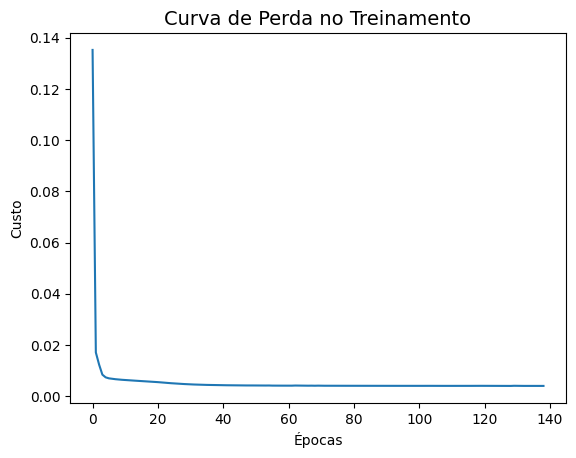

In [125]:
plt.plot(mlp_reg.loss_curve_) # Plotando o gráfico de erros no processo de treinamento - o loss_curve_ só funciona com o adam
plt.title("Curva de Perda no Treinamento", fontsize=14)
plt.xlabel('Épocas')
plt.ylabel('Custo')
plt.show()

Resumo das Métricas
Links de Referência:
- https://michael-fuchs-python.netlify.app/2019/06/30/metrics-for-regression-analysis/
- https://medium.com/turing-talks/como-avaliar-seu-modelo-de-regress%C3%A3o-c2c8d73dab96

In [126]:
print('Epochs: ', mlp_reg.n_iter_)
print('Loss: ', mlp_reg.loss_)
print('Mean Absolute Error (MAE): ', metrics.mean_absolute_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(testY, y_pred)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('Root Mean Squared Error (RMSE): ', metrics.mean_squared_error(testY, y_pred, squared=False)) # Variação de 0 ao infinito. Quanto menor, melhor.
print('R2 Score: ', metrics.r2_score(testY, y_pred)) # Apresenta em porcentagem de erros em relação ao desejado.

Epochs:  139
Loss:  0.003994210211147721
Mean Absolute Error (MAE):  0.07357693200415882
Mean Squared Error (MSE):  0.00910579145821934
Root Mean Squared Error (RMSE):  0.09542427080265974
R2 Score:  0.637808675600743


Sintonizador dos melhores Hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'hidden_layer_sizes': [(50), (100), (150)],
    'max_iter': [2000, 5000],
    'activation': ['tanh', 'relu'],
    'solver': [ 'adam', 'lbfgs'],
    'alpha': [0.01, 0.001],
    'learning_rate': ['constant','adaptive'],
}

grid = GridSearchCV(mlp_reg, param_grid, cv=5)
grid.fit(x, y.ravel())

print(grid.best_params_)

grid_predictions = grid.predict(testX)
df_temp2 = pd.DataFrame({'Actual': testY, 'Predicted': grid_predictions})
df_temp2.head()

df_temp2 = df_temp2.head(30)
df_temp2.plot(kind='bar',figsize=(10,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()